In [2]:
import numpy as np
import pandas as pd
import os
from mask_functions import rle2mask
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

In [3]:
# load the two reference submissions 
sub1 = pd.read_csv('submission/8523_0719_unet_512_seed3456_tta.csv.gz')
sub2 = pd.read_csv('submission/8503_0719_unet_512_ensemble5seeds_tta.csv.gz')
sub3 = pd.read_csv('submission/8385_0712_unet_512_seed1234.csv.gz')

In [4]:
sub1.head(5)

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.6160.151787519...,-1
1,1.2.276.0.7230010.3.1.4.8323329.582.1517875163...,618672 2 2 8 1012 2 2 8 1000 30 994 30 994 32 ...
2,1.2.276.0.7230010.3.1.4.8323329.6985.151787520...,-1
3,1.2.276.0.7230010.3.1.4.8323329.5865.151787519...,-1
4,1.2.276.0.7230010.3.1.4.8323329.6187.151787519...,225594 2 1022 2 1014 12 1012 12 1008 16 1008 1...


In [6]:
sub3.head(5)

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.6160.151787519...,-1
1,1.2.276.0.7230010.3.1.4.8323329.582.1517875163...,610480 2 16 12 994 2 16 12 992 8 4 22 990 8 4 ...
2,1.2.276.0.7230010.3.1.4.8323329.6985.151787520...,-1
3,1.2.276.0.7230010.3.1.4.8323329.5865.151787519...,-1
4,1.2.276.0.7230010.3.1.4.8323329.6187.151787519...,260364 2 1022 2 13282 6 1018 6 1014 10 1014 10...


In [49]:
# align indices
sub1.columns = ['ImageId', 'enc1']
sub2.columns = ['ImageId', 'enc2']
sub3.columns = ['ImageId', 'enc3']

sub = pd.merge(left=sub1, right=sub2, on='ImageId', how='inner')
sub = pd.merge(left=sub, right=sub3, on='ImageId', how='inner')
print(sub1.shape, sub2.shape, sub3.shape, sub.shape)

(1377, 2) (1377, 2) (1377, 2) (1377, 4)


In [50]:
(sub['enc1']!=sub['enc2']).mean(), (sub['enc1']!=sub['enc3']).mean(), (sub['enc2']!=sub['enc3']).mean()

(0.14960058097313, 0.14451706608569354, 0.13507625272331156)

In [55]:
((sub['enc1']=='-1')&(sub['enc2']=='-1')&(sub['enc3']=='-1')).mean()

0.8424110384894699

In [71]:
# identify the positions where sub1 has empty predictions but sub2 does not
idx1 = np.where((sub['enc1'] == '-1')&(sub['enc2'] != '-1'))[0]
idx2 = np.where((sub['enc1'] == '-1')&(sub['enc3'] != '-1'))[0]
#idx = np.concatenate([idx1, idx2])
idx1, idx2

(array([  90,   98,  130,  137,  164,  213,  216,  268,  348,  368,  383,
         426,  501,  558,  562,  576,  582,  679,  714,  756,  813,  934,
         951, 1012, 1052, 1114, 1125, 1154, 1159, 1367]),
 array([ 130,  213,  268,  346,  383,  558,  568,  713,  714,  756,  764,
         797,  813,  826,  904,  917,  940, 1052, 1114, 1159, 1234, 1299,
        1367]))

In [1]:
# is it really like missing mask?
enc = 'enc3'
i = idx2[11]

mask = rle2mask(sub.loc[i, enc], 1024, 1024)
mask = cv2.resize(mask, (512, 512))
img_id = sub.loc[i, 'ImageId']
img = plt.imread('data/processed/test/%s.png'%img_id)
img = cv2.resize(img, (512, 512))

plt.imshow(img, cmap=plt.cm.bone)
plt.imshow(mask, alpha=0.3, cmap="Reds")

In [80]:
sub.head(5)

,ImageId,enc1,enc2,enc3,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.6160.151787519...,-1,-1,-1,-1
1,1.2.276.0.7230010.3.1.4.8323329.582.1517875163...,612538 4 2 12 1006 4 2 12 994 28 996 28 992 36...,620718 10 1014 10 1010 14 1010 14 1008 16 4 4 ...,610480 2 16 12 994 2 16 12 992 8 4 22 990 8 4 ...,612538 4 2 12 1006 4 2 12 994 28 996 28 992 36...
2,1.2.276.0.7230010.3.1.4.8323329.6985.151787520...,-1,-1,-1,-1
3,1.2.276.0.7230010.3.1.4.8323329.5865.151787519...,-1,-1,-1,-1
4,1.2.276.0.7230010.3.1.4.8323329.6187.151787519...,221506 4 1020 4 1014 10 1014 10 1010 14 1010 1...,-1,260364 2 1022 2 13282 6 1018 6 1014 10 1014 10...,221506 4 1020 4 1014 10 1014 10 1010 14 1010 1...


In [79]:
# map non-empty sub2,sub3... slots to empty ones in sub1
sub['EncodedPixels'] = sub['enc1']
sub['EncodedPixels'][idx1] = sub['enc2'][idx1]
sub['EncodedPixels'][idx2] = sub['enc3'][idx2]

In [81]:
sub[['ImageId','EncodedPixels']].to_csv('submission/dirty_ensemble.csv.gz', index=False, compression='gzip')

In [ ]:
#dirty ensemble LB=0.8471

## voting on each pixel, [see here](https://www.kaggle.com/giuliasavorgnan/pneumothorax-models-ensemble-average)

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import os
from glob import glob
import sys
#import skimage.measure
import PIL
from tqdm import tqdm, tqdm_notebook

from dataset.mask_functions import rle2mask, mask2rle
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

## ensemble LB scores:
- ensemble different model architectures helps!!!

In [2]:
# read all submissions into daframes and store them in a list
# use_subs = ['../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed7890.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed8901.csv.gz'
#            ] #LB=0.663, min_solutions=2, pos_ratio=0.428

# use_subs = ['../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed7890.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed8901.csv.gz',
#             '../submission/655_1028_deeplabv3plus_resnet_512x768_v4_seed6789.csv.gz',
#             '../submission/655_1028_deeplabv3plus_resnet_512x768_v4_seed9012.csv.gz'
#            ] #LB=0.660, min_solutions=3, pos_ratio=0.435

# use_subs = ['../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed7890.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed8901.csv.gz',
#             '../submission/655_1028_deeplabv3plus_resnet_512x768_v4_seed6789.csv.gz',
#            ] #LB=0.658, min_solutions=2, pos_ratio=0.446

# use_subs = ['../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed7890.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed8901.csv.gz',
#             '../submission/655_1028_deeplabv3plus_resnet_512x768_v4_seed9012.csv.gz',
#            ] #LB=0.661, min_solutions=3, pos_ratio=0.419

# use_subs = ['../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz',
#             '../submission/657_1030_deeplabv3plus_resnet_512x768_v4_seed4321.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed8901.csv.gz'
#            ] #LB=0.661, min_solutions=2, pos_ratio=0.426

# use_subs = ['../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz',
#             '../submission/657_1030_deeplabv3plus_resnet_512x768_v4_seed4321.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed8901.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed7890.csv.gz', 
#             '../submission/656_1101_deeplabv3plus_resnet_512x768_v5_seed8765.csv.gz'
#            ] #LB=0.661, min_solutions=3, pos_ratio=0.428

# use_subs = ['../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz',
#             '../submission/657_1030_deeplabv3plus_resnet_512x768_v4_seed4321.csv.gz',
#             '../submission/656_1028_deeplabv3plus_resnet_512x768_v4_seed7890.csv.gz', 
#            ] #LB=0.659, min_solutions=2, pos_ratio=0.429

# use_subs = ['../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz',
#             '../submission/657_1030_deeplabv3plus_resnet_512x768_v4_seed4321.csv.gz',
#             '../submission/kaggler0_submission_segmentation_and_classifier.csv'
#            ] #LB=0.663, min_solutions=2, pos_ratio=0.430

# use_subs = ['../submission/661_1103_deeplabv3plus_resnet_512x768_v6_seed2001.csv.gz',
#             '../submission/658_1103_deeplabv3plus_resnet_512x768_v6_seed2003.csv.gz',
#             '../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz'
#            ] #LB=0.659, min_solutions=2, pos_ratio=0.431

# use_subs = ['../submission/661_1103_deeplabv3plus_resnet_512x768_v6_seed2001.csv.gz',
#             '../submission/659_1108_deeplabv3plus_resnet_512x768_v6_seed2009.csv.gz',
#             '../submission/659_1108_deeplabv3plus_resnet_512x768_v6_seed2010.csv.gz'
#            ] #LB=0.663, min_solutions=2, pos_ratio=0.417

# use_subs = ['../submission/661_1103_deeplabv3plus_resnet_512x768_v6_seed2001.csv.gz',
#             '../submission/6614_1109_deeplabv3plus_resnet_512x768_v10_seed2021-4ch-empty-fix.csv.gz',
#             '../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz'
#            ] #LB=0.6642, min_solutions=2, pos_ratio=0.426

# use_subs = ['../submission/661_1103_deeplabv3plus_resnet_512x768_v6_seed2001.csv.gz',
#             '../submission/6614_1109_deeplabv3plus_resnet_512x768_v10_seed2021-4ch-empty-fix.csv.gz',
#             '../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz', 
#             '../submission/659_1108_deeplabv3plus_resnet_512x768_v6_seed2009.csv.gz',
#             '../submission/659_1108_deeplabv3plus_resnet_512x768_v6_seed2010.csv.gz'
#            ] #LB=0.6635, min_solutions=3, pos_ratio=0.420; LB=.6635, min_solutions=2, pos_ratio=.448

# use_subs = ['../submission/661_1103_deeplabv3plus_resnet_512x768_v6_seed2001.csv.gz',
#             '../submission/6614_1109_deeplabv3plus_resnet_512x768_v10_seed2021-4ch-empty-fix.csv.gz',
#             '../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz', 
#             '../submission/655_1112_fpn_resnet34_512x768_v1_seed2034-35-36-37-38.csv.gz',
#             '../submission/655_1112_fpn_resnet34_512x768_v1_seed2034.csv.gz'
#            ] #LB=0.6643, min_solutions=3, pos_ratio=0.42; LB=., min_solutions=2, pos_ratio=.

# use_subs = ['../submission/661_1103_deeplabv3plus_resnet_512x768_v6_seed2001.csv.gz',
#             '../submission/6614_1109_deeplabv3plus_resnet_512x768_v10_seed2021-4ch-empty-fix.csv.gz',
#             '../submission/658_1027_deeplabv3plus_resnet_512x768_v4_seed4567.csv.gz', 
#             '../submission/6577_1114_fpn_resnet34_1024x1536_v1_seed2043-2044-2045.csv.gz',
#             '../submission/655_1112_fpn_resnet34_512x768_v1_seed2034.csv.gz'
#            ] #LB=0.6655, min_solutions=3, pos_ratio=.42; LB=.6656, min_solutions=2, pos_ratio=.458

# use_subs = ['../submission/6633_1115_deeplabv3plus_resnet_512x768_v13_seed2047-48-49-50-51.csv.gz',
#             '../submission/6574_1115_unet_resnet34_512x768_v1_seed2060-61-62.csv.gz',
#             '../submission/6577_1114_fpn_resnet34_1024x1536_v1_seed2043-2044-2045.csv.gz'
#            ]#LB=.6685, min_solutions=2, pos_ratio=.408

use_subs = ['../submission/6633_1115_deeplabv3plus_resnet_512x768_v13_seed2047-48-49-50-51.csv.gz',
            '../submission/6637_1116_unet_resnet34_384x576_v1_seed2080-81-82-83-84.csv.gz',
            '../submission/6577_1114_fpn_resnet34_1024x1536_v1_seed2043-2044-2045.csv.gz'
           ]#LB=.6698, min_solutions=2, pos_ratio=.409

print('use how many subs: ', len(use_subs))
df_sub_list = [pd.read_csv(f).fillna('') for f in use_subs]#.set_index(['Image_Label'])
use_subs

use how many subs:  3


['../submission/6633_1115_deeplabv3plus_resnet_512x768_v13_seed2047-48-49-50-51.csv.gz',
 '../submission/6637_1116_unet_resnet34_384x576_v1_seed2080-81-82-83-84.csv.gz',
 '../submission/6577_1114_fpn_resnet34_1024x1536_v1_seed2043-2044-2045.csv.gz']

In [3]:
sub_merged = None

for idx, df_sub in enumerate(df_sub_list):
    df_sub.rename(columns={'EncodedPixels': 'EncodedPixels_%d'%idx}, inplace=True)
    if sub_merged is None:
        sub_merged = df_sub
    else:
        sub_merged = sub_merged.merge(df_sub, on=['Image_Label'])

sub_merged.head(5)

,Image_Label,EncodedPixels_0,EncodedPixels_1,EncodedPixels_2
0,10055ff.jpg_Fish,,,
1,10055ff.jpg_Flower,,,
2,10055ff.jpg_Gravel,110 11 125 123 417 217 760 232 1099 251 1447 2...,1587 1 1593 3 1603 4 1930 2 1933 7 1942 4 1952...,1219 5 1229 6 1288 1 1565 22 1636 4 1906 1 190...
3,10055ff.jpg_Sugar,3 184 201 4 215 129 352 345 701 347 1051 347 1...,54 1 56 4 65 2 68 1 73 3 77 1 84 1 88 1 261 1 ...,12 131 235 77 354 154 569 117 703 162 910 131 ...
4,6e54759.jpg_Fish,,,


In [4]:
## Create average prediction mask for each image ##
# set here the threshold for the final mask
# min_solutions is the minimum number of times that a pixel has to be positive in order to be included in the final mask
min_solutions = 2 # if avg_mask>=min_solutions, then predict a pixel=1
assert (min_solutions >= 1 and min_solutions <= len(df_sub_list)), \
    "min_solutions has to be a number between 1 and the number of submission files"

In [5]:
def vote_for_mask(rles, min_solutions):
    """
    """
    vote_mask = np.zeros((350, 525))
    for rle in rles:#N models
        if str(rle)!='':
            mask = rle2mask(rle, (525, 350))
            #mask = (mask>0.5).astype(np.float32)
            vote_mask += mask
    pred_mask = (vote_mask >= min_solutions).astype(np.uint8)
    if pred_mask.sum() > 0:
        return mask2rle(pred_mask)
    else:
        return ''

# idx = 8
# rles = sub_merged.loc[idx, ][1:].tolist()
# mask_voted = vote_for_mask(rles, min_solutions)
# mask_voted

In [5]:
#plt.imshow(rle2mask(sub_merged.loc[1100, 'EncodedPixels'], (525, 350)))
#plt.imshow(rle2mask(sub_merged.loc[105, 'EncodedPixels']))

In [6]:
%%time
res = []
for idx in tqdm_notebook(sub_merged.index):
    rles = sub_merged.loc[idx, ][1:].tolist()
    mask_voted = vote_for_mask(rles, min_solutions)
    res.append(mask_voted)
    
    if idx%5000==0:
        print(idx)

0
5000
10000

CPU times: user 1min 7s, sys: 772 ms, total: 1min 7s
Wall time: 1min 11s


In [7]:
sub_merged['ensemble'] = res
sub_merged.head(5)

,Image_Label,EncodedPixels_0,EncodedPixels_1,EncodedPixels_2,ensemble
0,10055ff.jpg_Fish,,,,
1,10055ff.jpg_Flower,,,,
2,10055ff.jpg_Gravel,110 11 125 123 417 217 760 232 1099 251 1447 2...,1587 1 1593 3 1603 4 1930 2 1933 7 1942 4 1952...,1219 5 1229 6 1288 1 1565 22 1636 4 1906 1 190...,1219 5 1229 6 1288 1 1565 23 1593 3 1603 4 163...
3,10055ff.jpg_Sugar,3 184 201 4 215 129 352 345 701 347 1051 347 1...,54 1 56 4 65 2 68 1 73 3 77 1 84 1 88 1 261 1 ...,12 131 235 77 354 154 569 117 703 162 910 131 ...,12 131 235 77 354 171 561 134 703 175 907 139 ...
4,6e54759.jpg_Fish,,,,


In [8]:
for col in sub_merged.columns[1:]:
    print(col, (sub_merged[col]!='').mean())

EncodedPixels_0 0.4115738236884803
EncodedPixels_1 0.4053542455381287
EncodedPixels_2 0.4162385073012439
ensemble 0.40974851270957274


In [9]:
final_sub = sub_merged[['Image_Label', 'ensemble']]
final_sub.rename(columns={'ensemble': 'EncodedPixels'}, inplace=True)
final_sub.head(5)

/home/endi.niu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Image_Label,EncodedPixels
0,10055ff.jpg_Fish,
1,10055ff.jpg_Flower,
2,10055ff.jpg_Gravel,1219 5 1229 6 1288 1 1565 23 1593 3 1603 4 163...
3,10055ff.jpg_Sugar,12 131 235 77 354 171 561 134 703 175 907 139 ...
4,6e54759.jpg_Fish,


In [10]:
final_sub.to_csv('../submission/dirty_ensemble.csv.gz', index=False, compression='gzip')

In [49]:
i = 30

59


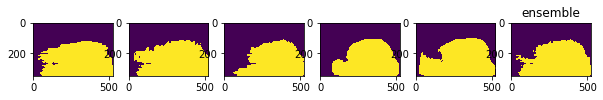

In [78]:
i += 1
print(i)

fig = plt.figure(figsize=(10, 8))

rles = sub_merged.loc[i, ][1:]

for idx, rle in enumerate(rles):
    if rle=='':
        _mask = np.zeros((350, 525), dtype=np.float)
    else:
        _mask = rle2mask(rle, (525, 350))
    ax = fig.add_subplot(1, len(rles), idx+1)
    plt.imshow(_mask)
    if idx==len(rles)-1:
        plt.title('ensemble')
#print('Done')

In [1]:
import pandas as pd
import numpy as np

In [31]:
#fname = '../submission/6609_1109_deeplabv3plus_resnet_512x768_v10_seed2021.csv.gz'
fname = '../submission/dirty_ensemble.csv.gz'
#fname = '../data/raw/train.csv'

sub = pd.read_csv(fname).fillna('')
sub['img_id'] = [name.split('.')[0] for name in sub.Image_Label]
sub['has_mask'] = (sub.EncodedPixels!='').astype(np.int)
sub.head(3)

,Image_Label,EncodedPixels,img_id,has_mask
0,10055ff.jpg_Fish,,10055ff,0
1,10055ff.jpg_Flower,,10055ff,0
2,10055ff.jpg_Gravel,1217 23 1560 2 1563 34 1599 2 1618 4 1623 2 18...,10055ff,1


In [32]:
agg = sub.groupby(['img_id'])['has_mask'].agg(['sum'])

In [33]:
agg['sum'].value_counts()# / 3698

2    1793
1    1449
3     366
0      81
4       9
Name: sum, dtype: int64

In [18]:
## the train.csv
agg['sum'].value_counts() / 5546

2    0.427696
3    0.281284
1    0.243058
4    0.047962
Name: sum, dtype: float64

### post process

In [90]:
def post_process(mask, min_size):
    """
    Post processing of each predicted mask, components with lesser number of pixels
    than `min_size` are ignored
    """
    #mask = cv2.threshold(probability, threshold, 1, cv2.THRESH_BINARY)[1]
    num_component, component = cv2.connectedComponents(mask.astype(np.uint8))
    predictions = np.zeros((350, 525), np.float32)
    num = 0
    for c in range(1, num_component):
        p = (component == c)
        if p.sum() > min_size:
            predictions[p] = 1
            num += 1
    return predictions, num

In [91]:
sub = pd.read_csv('../submission/dirty_ensemble.csv.gz').fillna('')
sub.head(5)

,Image_Label,EncodedPixels
0,10055ff.jpg_Fish,
1,10055ff.jpg_Flower,
2,10055ff.jpg_Gravel,1217 12 1564 20 1599 2 1618 4 1910 72 2253 4 2...
3,10055ff.jpg_Sugar,10 123 264 58 356 144 592 90 704 150 939 98 10...
4,6e54759.jpg_Fish,


In [92]:
(sub.EncodedPixels!='').mean()

0.4200919415900487

In [93]:
%%time

for idx in sub.index:
    rle = sub.loc[idx, 'EncodedPixels']
    if str(rle)!='':
        mask = rle2mask(rle, (525, 350))
        predictions, num = post_process(mask, min_size=5000)#20000
        if num==0:
            sub.loc[idx, 'EncodedPixels'] = ''
        else:
            sub.loc[idx, 'EncodedPixels'] = mask2rle(predictions)
    else:
        continue

CPU times: user 1min 36s, sys: 4.84 s, total: 1min 41s
Wall time: 1min 4s


In [94]:
(sub.EncodedPixels!='').mean()

0.41928069226608977

In [95]:
sub.to_csv('../submission/dirty_ensemble_with_postprocess.csv.gz', index=False, compression='gzip')

In [76]:
#idx = 5
idx += 1
rle = sub.loc[idx, 'EncodedPixels']
mask = rle2mask(rle, (525, 350))
predictions, num = post_process(mask, min_size=20000)#15000
num

1

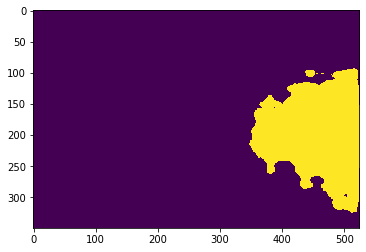

In [77]:
plt.imshow(mask)

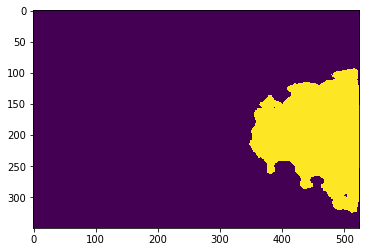

In [78]:
plt.imshow(predictions)